# Base R Part 2
In this lecture, we will cover some essential concepts around functions and flow control (loops, apply functions, if-else statements). We will also explore the distinction between global and local variables. We will finish with a short introduction to simulation (i.e., iteratively changing cells by calling the previous cell). We will briefly discuss error handling (*i.e.*, try-catch).

Let's pick up where we left off in Base R Part 1, with our data frame.

In [1]:
# Create the data frame
myPpl <- data.frame(
   name = c("Andie", "Sam", "Bill"),
   gender = c("Female", "non-binary", "Male"),
   male = c(FALSE, FALSE, TRUE),
   income_cat = c("middle", "poor", "rich"),
   park_dist = c(1, 0.5, 0.1)
)
myPpl


name,gender,male,income_cat,park_dist
<chr>,<chr>,<lgl>,<chr>,<dbl>
Andie,Female,FALSE,middle,1.0
Sam,non-binary,FALSE,poor,0.5
Bill,Male,TRUE,rich,0.1


Remember how we can reference our columns, rows, and cells 

- Column:
    - Version One: `myPpl$var_name`
    - Version Two: `myPpl[, j]` where `j` is our column number 
- Row: `myPpl[i, ]` where `i` is our row number
- Cell: `myPpl[i,j]`


# Functions

Functions: once you have initialized them, they take in an input, perform a set of operations on them, and
then give you some return value.

These are helpful when you have something that you do often.

- Recent example for me:
    - Wrote a function to take a date and return the season
    - Wrote a function to get Kelvin and return 
- Rule of thumb: if you’re copying and pasting code 3 times or more, make a function
- I say if you are going to copy-paste ever, because even if you think it’ll only be twice it’ll probably be more

## Pseudo Code Example 

my function: y = x + 3; return y 

If you gave this function x=3, what would it return for y? 

## Let's write a function
Let's say we want to write a function that models the relationship between the probability of someone visiting a national park and the temperature (F). You know that people don't visit the park when it's very cold, nor when it's very hot. You model the relationship using the following quadratic equation 
$$v = F/100 - (F/100)^2$$
where $v$ is visits and $F$ is the temperature. 

We want to get the function the temperature $F$ and have it return the predicted number of trips taken $v$. 

In [2]:
get_visits <- function(F){
    v <- F/100 - (F/100)^2
    return(v)
}

get_visits(0) # returns 0 
get_visits(25) # returns 0.1875
get_visits(50) # returns 0.25
get_visits(75) # returns 0.1875
get_visits(100)# returns 0 


[1] 0

[1] 0.1875

[1] 0.25

[1] 0.1875

[1] 0

So we can see that as the temperature increases from 0F to 50F, the probability of someone taking a trip increases up to 25%. However, after 50F, the probability of taking a trip begins to decrease. 

# Global vs Local Variables

In most programming languages (including R and Python), variables can have different scopes, meaning they can be either global or local. Understanding the distinction between global and local variables is crucial for writing functions and controlling the flow of your code.

- **Global Variables**: These are variables that are defined in the main body of your script and can be accessed from anywhere in the script.
- **Local Variables**: These are variables that are defined within a function and can only be accessed from within that function.

Let's look at an example to illustrate this distinction.

In [3]:
# Global variable
global_var <- "I am a global variable"
global_var

# Function to demonstrate local variable
local_example <- function() {
    # Local variable
    local_var <- "I am a local variable"
    
    # Print local variable
    print(local_var)
    
    # Print global variable
    print(global_var)
}

# Call the function
local_example()

# Try to print the local variable outside the function (this will cause an error)
print(local_var)

[1] "I am a global variable"

[1] "I am a local variable"
[1] "I am a global variable"


ERROR: Error in eval(expr, envir, enclos): object 'local_var' not found


# Error Handling
Now that we have purposefully thrown an error, we can discuss error handling. 

Error handling is an important aspect of programming that allows you to manage and respond to errors in a controlled way. In R, you can use functions like `try()` and `tryCatch()` to handle errors. These are very useful to use in loops or apply functions when you're concerned some observations may cause an error but you'd like your code to attempt all iterations. 

- **try()**: This function allows you to run a piece of code and catch any errors that occur.
    - It returns the result of the code if it runs successfully, or an error object if an error occurs.
    - By returning an error object, you're able to keep moving forward.
- **tryCatch()**: This function provides more control over error handling by allowing you to specify different actions for different types of conditions (errors, warnings, messages).

## How to handle errors for now (the less technical way)

While we won't go into detailed examples here, it's important to be aware of these functions and how they can be used to make your code more robust and error-tolerant.

As a beginner programmer, encountering errors is a common and essential part of the learning process. Here are some strategies to effectively address errors:

1. **Read Error Messages Carefully**:
    - Error messages often provide valuable information about what went wrong and where. Take the time to read and understand them.

2. **Google the Error**:
    - Copy and paste the error message into a search engine. Often, you will find forums, blog posts, or documentation that address similar issues.

3. **Use Stack Overflow**:
    - Stack Overflow is a popular platform where developers ask and answer programming questions. Search for your error or ask a new question if you can't find a solution. Be sure to provide a clear and concise description of your problem, including relevant code snippets.

4. **Consult Documentation**:
    - Official documentation for the programming language or library you are using can be very helpful. It often includes examples and explanations of common errors.

5. **Cautiously Leverage AI Tools**:
    - AI tools like ChatGPT can provide code suggestions and help identify potential issues in your code. These tools can be particularly useful for beginners who are still learning the syntax and best practices.
    - However, be **very careful** to not use these resources as a crutch. If you depend on them too much, you will miss the opportunity to learn how to code for yourself!

6. **Ask for Help**:
    - Don't hesitate to ask for help from more experienced programmers, whether they are colleagues, mentors, or members of online communities. Providing a clear explanation of your problem and what you have tried so far will increase your chances of getting useful assistance and is a good exercise in identifying your problem.

7. **Practice Debugging**:
    - Debugging is a skill that improves with practice.
    - It sometimes feels like suffering, but you will become a better programmer by struggling through your own errors. 




# Loops

- for loops: iterates through a task for a set number of times
- Consider these loops (pseudo code):
    - For (i in 1 through 4) { print i }
    - For (i in 1 through 4) { print i / 4}
- Can be helpful when
    - Iterating through a column of data and doing something to each row
    - Constructing a new column and want to construct each row from scratch
    - Simulation model

In [4]:
# Complicated code that is simplified by the loop
print(1)
print(2)
print(3)
print(4)

[1] 1
[1] 2
[1] 3
[1] 4


In [5]:
# the following loop does the exact same thing
for (i in 1:4){
    print(i)
}

[1] 1
[1] 2
[1] 3
[1] 4


In [6]:
# Operations or code run outside of a for loop can be run inside of a for loop
for (i in 1:4){
    print(i/4) # performing a division operation within the for loop
}

[1] 0.25
[1] 0.5
[1] 0.75
[1] 1


## Let's combine a loop with our earlier function

In [7]:
# First, let's create a vector of the max_temps we want to get visits for
max_temps <- seq(0, 100, by = 10)
max_temps

# combining loop and our function
for (i in max_temps){
    y <- get_visits(i)
    print(y)
}

[1]   0  10  20  30  40  50  60  70  80  90 100

[1] 0
[1] 0.09
[1] 0.16
[1] 0.21
[1] 0.24
[1] 0.25
[1] 0.24
[1] 0.21
[1] 0.16
[1] 0.09
[1] 0


## Iterating over a data frame
Let's recall our data frame `myPpl`. We can use a for loop to iteratively change each cell in a column. 

Let's say all three of our people, Andie, Sam, and Bill, move one mile away from their nearest park (bummer). We could do this one line at a time, like this:

In [8]:
# the [i] here is indicating which row we are editing
myPpl$new_park_dist_a[1] <- myPpl$park_dist[1] + 1 # edit for Andie
myPpl$new_park_dist_a[2] <- myPpl$park_dist[2] + 1 # edit for Sam
myPpl$new_park_dist_a[3] <- myPpl$park_dist[3] + 1 # edit for Bill

# print
myPpl

name,gender,male,income_cat,park_dist,new_park_dist_a
<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>
Andie,Female,FALSE,middle,1.0,2.0
Sam,non-binary,FALSE,poor,0.5,1.5
Bill,Male,TRUE,rich,0.1,1.1


This worked, but there is an easier way to do it with a loop. The loop will help minimize the chance of making an error and shorten the amount of code we need to write to achieve our goal.

In [9]:
for(i in seq_along(myPpl$park_dist)){
    # change all people's distance
    myPpl$new_park_dist_b[i] <- myPpl$park_dist[i] + 1 
}

myPpl

name,gender,male,income_cat,park_dist,new_park_dist_a,new_park_dist_b
<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>
Andie,Female,FALSE,middle,1.0,2.0,2.0
Sam,non-binary,FALSE,poor,0.5,1.5,1.5
Bill,Male,TRUE,rich,0.1,1.1,1.1


We can see that both versions (a versus b) worked the same. However, the for loop simplifies the approach. 

# Loops for Simulation 

Next, we're going to discuss how we can use a loop to write a simulation model. Let's consider a scenario where the initial temperature is 15 *C. For the next 50 years, the temperature increases by 0.02 degrees annually. Let's create a data frame that contains every years' temperature. 

In [10]:
# Initialize parameters
initial_temp <- 15 # Initial temperature in degrees Celsius
n_year <- 51 # Number of n_year to simulate
temp_increase_per_year <- 0.02 # Temperature increase per year in degrees Celsius

# Create a numeric vector for the 50 years we will simulate
years <- numeric(n_year)
years[1] <- 2025 # initialize the first year

# Create a numeric vector for the 50 years of temperatures we will simulate
max_temps <- numeric(n_year)
max_temps[1] <- initial_temp # initialize temp in first year

# Simulate the temperature change over the n_year 
# notice this will start in year TWO
for (yr in 2:n_year) {
    years[yr] <- years[yr - 1] + 1 # fill in the years
    max_temps[yr] <- max_temps[yr - 1] + temp_increase_per_year # fill in the max_temps
}

# Create a data frame to store the results
simulation_results <- data.frame(
    Year = years,
    Temperature = max_temps
)

# Print the results
head(simulation_results) # show the first few rows 


,Year,Temperature
,<dbl>,<dbl>
1,2025,15.00
2,2026,15.02
3,2027,15.04
4,2028,15.06
5,2029,15.08
6,2030,15.10


In [11]:
tail(simulation_results)

,Year,Temperature
,<dbl>,<dbl>
46,2070,15.90
47,2071,15.92
48,2072,15.94
49,2073,15.96
50,2074,15.98
51,2075,16.00


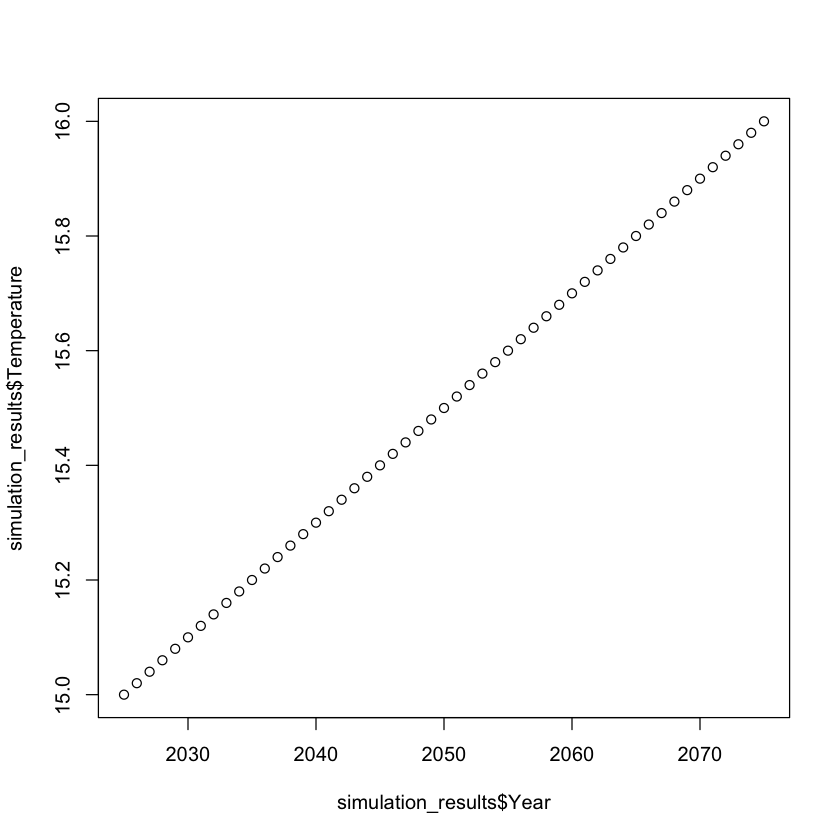

In [12]:
# Plot the results
plot(x = simulation_results$Year, y = simulation_results$Temperature)


# Apply functions 
Apply functions in R are powerful tools for performing operations on data structures like vectors, lists, and data frames. They are often more efficient and concise than loops. Here is an example using the `apply()` function to calculate the mean of each column in a data frame.

Say you are studying three national parks (Yellowstone, Glacier, and Yosemite). You have been collecting data at each, and you want to quickly find the average temperature at each site. 

Let's do this two ways. First, finding it for each row one line at a time. Second, using an apply function to iterate across the rows. 


In [13]:
# Create a sample data frame
df <- data.frame(
    yellowstone = c(0, -5, 50, 102, 76),
    glacier = c(-10, -15, 40, 92, 66),
    yosemite = c(20, 15, 70, 122, 96)
)

df

yellowstone,glacier,yosemite
<dbl>,<dbl>,<dbl>
0,-10,20
-5,-15,15
50,40,70
102,92,122
76,66,96


In [14]:
# Calculate the mean temperature for each park
mean_yellowstone <- mean(df$yellowstone)
mean_glacier <- mean(df$glacier)
mean_yosemite <- mean(df$yosemite)

# Print the results
mean_yellowstone
mean_glacier
mean_yosemite

[1] 44.6

[1] 34.6

[1] 64.6

Now let's use the `apply()` function to calculate the mean temperature for each park in a more efficient way.

An apply funciton lets you quickly apply a function to either: 

1. every row in the dataframe 
2. every column in the dataframe 

In our case, we want the mean of every column. 

In [15]:
# Calculate the mean temperature for each park using apply function
mean_max_temps <- apply(df, 2, mean)

# Print the results
mean_max_temps

yellowstone     glacier    yosemite 
       44.6        34.6        64.6

# If Else Statements 

- Sometimes you want to execute a task ONLY if a certain condition is met
- Let's return to our myPpl dataset one last time (for today):
    - Our RA did not record women and non-binary's *original* distances from parks correcly
    - All women and non-binary people are actually 0.25 miles closer to parks than thought 
- What would the correct DF look like?
    - If statements let you fix a mistake like this
    - Also demonstrates why the Boolean (true/false or indicator) variable is so powerful

In [17]:
# goes through each row and changes distance if someone is not male
for (i in seq_along(myPpl$male)) {
    if (myPpl$male[i] == FALSE) { # check if someone is "not male"
        myPpl$park_dist_correct[i] <- myPpl$park_dist[i] - 0.25 # adjust
    }else{
        myPpl$park_dist_correct[i] <- myPpl$park_dist[i]
    }
}

myPpl

name,gender,male,income_cat,park_dist,new_park_dist_a,new_park_dist_b,park_dist_correct
<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Andie,Female,FALSE,middle,1.0,2.0,2.0,0.75
Sam,non-binary,FALSE,poor,0.5,1.5,1.5,0.25
Bill,Male,TRUE,rich,0.1,1.1,1.1,0.10
